<a href="https://colab.research.google.com/github/bschmid36/DeepLearning_SVHN_Digit_Recognition/blob/main/NN_Project_Learner_Notebook_SVHN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Neural Networks Project: Street View Housing Number Digit Recognition**

# **Marks: 30**

Welcome to the project on classification using Artificial Neural Networks. We will work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a feed-forward neural network model that can recognize the digits in the images. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**



In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.12.0


## **Loading the dataset**



In [ ]:
import h5py



h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')



X_train = h5f['X_train'][:]

y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]

y_test = h5f['y_test'][:]




h5f.close()

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**


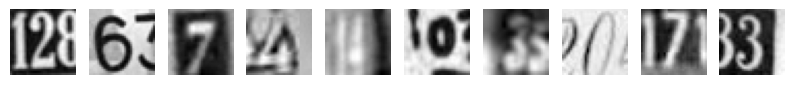

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in the dataset and printing their labels

plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**


In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset to flatten them. Reshaping the 2D image into 1D array

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [ ]:
# Normalizing inputs from 0-255 to 0-1

X_train = X_train.astype('float32')/255.0

X_test = X_test.astype('float32')/255.0

In [ ]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [ ]:
# One-hot encode output

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## **Model Building**


In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Defining the model

def nn_model_1():

    model = Sequential() 
    
    model.add(Dense(64, activation='relu',input_shape=(1024,)))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(10, activation='softmax'))
      
    # Compile the model

    model.compile(optimizer=Adam(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [ ]:
# Build the model

model_1 = nn_model_1()

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model

history_model_1 = model_1.fit(X_train,y_train,epochs=20,validation_split=0.2,batch_size=128,verbose=1)

Epoch 1/20
263/263 [==============================] - 2s 7ms/step - loss: 2.3026 - accuracy: 0.1029 - val_loss: 2.3028 - val_accuracy: 0.1014
Epoch 2/20
263/263 [==============================] - 2s 6ms/step - loss: 2.3026 - accuracy: 0.1021 - val_loss: 2.3028 - val_accuracy: 0.1014
Epoch 3/20
263/263 [==============================] - 2s 6ms/step - loss: 2.3026 - accuracy: 0.1021 - val_loss: 2.3028 - val_accuracy: 0.1014
Epoch 4/20
263/263 [==============================] - 2s 6ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3028 - val_accuracy: 0.1014
Epoch 5/20
263/263 [==============================] - 1s 6ms/step - loss: 2.3026 - accuracy: 0.1015 - val_loss: 2.3029 - val_accuracy: 0.1014
Epoch 6/20
263/263 [==============================] - 2s 6ms/step - loss: 2.3026 - accuracy: 0.1021 - val_loss: 2.3028 - val_accuracy: 0.1014
Epoch 7/20
263/263 [==============================] - 2s 8ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.0975
Epoch 

### **Plotting the validation and training accuracies**

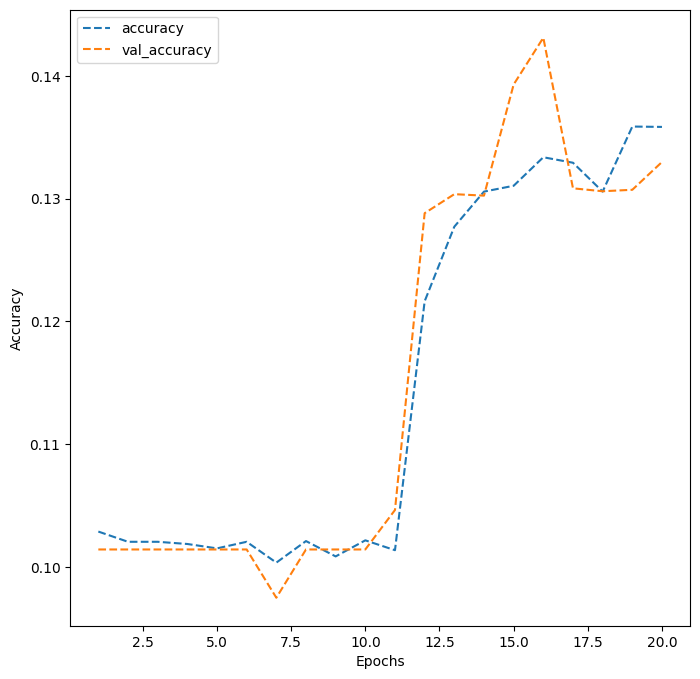

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- This model is not performing very well with an accuracy of ~14%. The parameters need to be tuned to increase performance.

In [ ]:
# Clearing backend

from tensorflow.keras import backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
# Define the model

def nn_model_2():

    model = Sequential()  
        
    model.add(Dense(256, activation='relu',input_shape=(1024,)))

    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(BatchNormalization())

    model.add(Dense(10, activation='softmax'))
    
    # Compile the model

    model.compile(optimizer=Adam(learning_rate = 0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [ ]:
# Build the model

model_2 = nn_model_2()

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [ ]:
# Fit the model

history_model_2 = model_2.fit(X_train,y_train,epochs=30,validation_split=0.2,batch_size=128,verbose=1)

Epoch 1/30
263/263 [==============================] - 6s 14ms/step - loss: 2.3301 - accuracy: 0.1020 - val_loss: 2.3126 - val_accuracy: 0.0969
Epoch 2/30
263/263 [==============================] - 4s 15ms/step - loss: 2.3040 - accuracy: 0.1043 - val_loss: 2.3018 - val_accuracy: 0.1049
Epoch 3/30
263/263 [==============================] - 5s 20ms/step - loss: 2.1035 - accuracy: 0.2029 - val_loss: 1.9555 - val_accuracy: 0.2789
Epoch 4/30
263/263 [==============================] - 4s 14ms/step - loss: 1.6221 - accuracy: 0.4240 - val_loss: 1.5954 - val_accuracy: 0.4607
Epoch 5/30
263/263 [==============================] - 3s 13ms/step - loss: 1.3656 - accuracy: 0.5424 - val_loss: 1.2720 - val_accuracy: 0.5899
Epoch 6/30
263/263 [==============================] - 3s 13ms/step - loss: 1.1958 - accuracy: 0.6150 - val_loss: 1.1094 - val_accuracy: 0.6462
Epoch 7/30
263/263 [==============================] - 7s 27ms/step - loss: 1.1250 - accuracy: 0.6400 - val_loss: 1.0664 - val_accuracy: 0.6543

### **Plotting the validation and training accuracies**

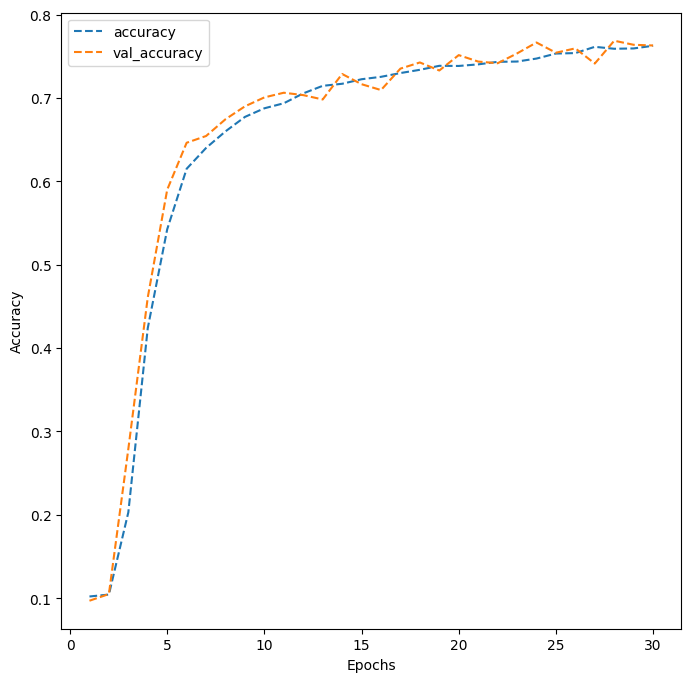

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
- The performance of this model is much improved
- The validation accuracy is approx. 76% and is very close to the training accuracy which indicates this model is not overfitting the data.

## **Predictions on the test data**


In [ ]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 3ms/step


In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1814
           1       0.74      0.79      0.77      1828
           2       0.77      0.80      0.79      1803
           3       0.62      0.77      0.69      1719
           4       0.79      0.83      0.81      1812
           5       0.76      0.68      0.72      1768
           6       0.80      0.74      0.77      1832
           7       0.83      0.77      0.80      1808
           8       0.72      0.72      0.72      1812
           9       0.75      0.74      0.75      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



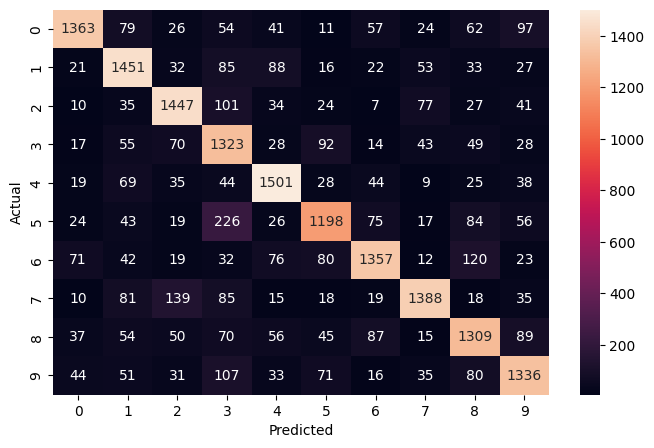

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)    

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**
- The model is giving about 76% accuracy on the test data which is comparable to the accuracy of the validation data. - - This implies that the model is giving a generalized performance.
- The recall has a large range which implies that the model is good at identifying some numbers while poor at identifying some other numbers. 
- The model often predicts 3 when the input is 5 and 2 when the input is 7. This makes sense because they have similar features.
- The input images contained multiple numbers as can be seen in the visualization at the beginning of the notebook so this could cause some issues because the model may be getting confused with the focus of some input images
- This model does a decent job however a convolutional NN tends to work better for images so that will be attempted in the next notebook.